In [1]:
#importing main data analysis libraries  
import pandas as pd 
import numpy as np
#importing main visualization libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

%matplotlib inline 

#set visualization settings
large = 30; med = 14; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (13, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [2]:
train = pd.read_csv('C:/Users/Asus/Education/Portfolio_Projects/hr_promote_analysis/raw_data/train.csv')

#read train dataset, all transformation we will do on our test dataset, but later

# Plan 
In this part we will clean our data, prepare it for model building and etc. Let's look at plan what we will do.
1. Remove NaN values
2. Handling outliers
3. Remove extra features
4. Transform categorical variable to quantitative
5. Create new features
    1. Start of the career in company
    2. etc.
6. Feature scaling


## Removing NaN values

In [3]:
train.info()

#we have lost values in 'education' and 'previous_year_rating' features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [4]:
train.isna().sum()
#we need to look how many was lost, not bad, but we should fix it

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Education

In [5]:
edu_nan_1 = train.drop(columns= ['previous_year_rating'], axis = 1)
edu_nan_2 = edu_nan_1[edu_nan_1.isna().any(axis=1)]
#we got table with nan values in education part

In [6]:
edu_nan_2.department.value_counts()

#as we can see most of NaN values in Sales & Marketing department, let's look how many of them have education

Sales & Marketing    1575
Analytics             337
Operations            226
Technology             99
Procurement            72
Finance                36
HR                     32
R&D                    28
Legal                   4
Name: department, dtype: int64

In [7]:
train[train.department == 'Sales & Marketing'].education.value_counts()

#The vast majority of all staff in this department have a bachelor’s degree, i think, that we can fill that
#with 'Bachelor's', let's look other

Bachelor's          11099
Master's & above     4166
Name: education, dtype: int64

In [8]:
train[(train.department == 'Analytics') | (train.department == 'Operations')].education.value_counts()
#Analytics and Operations have a lot of bachelor's degree employees, so in my opinion we should fill this column na with
#'Bachelor's'

Bachelor's          11759
Master's & above     4202
Below Secondary       176
Name: education, dtype: int64

In [9]:
train['education'] = train['education'].fillna(value = ("Bachelor's"))
#filling na values with "Bachelor's"

In [10]:
train.isna().sum()
#now we don't have nan values in education column

employee_id                0
department                 0
region                     0
education                  0
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Previous year rating
In this part we will fill na values in previous_year_rating column, in my opinion most of them working for a first year, because of this they didn't have this value

employee_id             4547
department              4547
region                  4547
education               4547
gender                  4547
recruitment_channel     4547
no_of_trainings         4547
age                     4547
previous_year_rating     423
length_of_service       4547
KPIs_met >80%           4547
awards_won?             4547
avg_training_score      4547
is_promoted             4547
dtype: int64

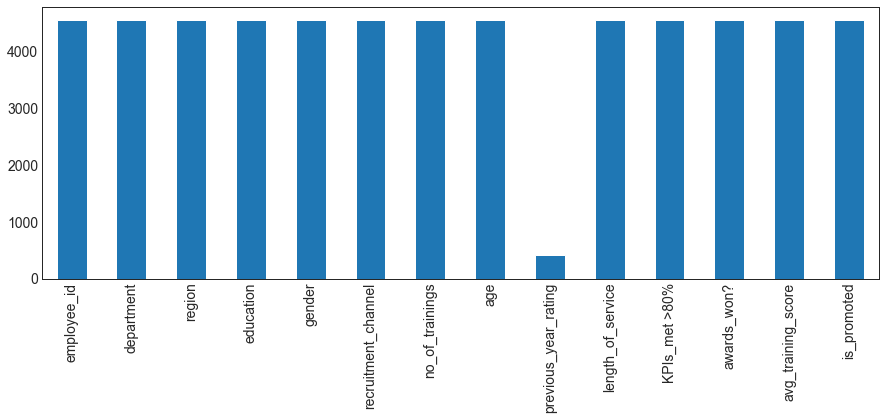

In [11]:
plt.subplots(figsize=(15,5))
train[train.length_of_service == 1].count().plot.bar()
train[train.length_of_service == 1].count()

#as we can see there are a lot of missed values in first year of service
#so we can fill them by 1, but its not fair to all first year employees, 
#so we should explore how many people promote in first year and choose optimal value to fill

In [12]:
first_year = train[(train.length_of_service == 1) & (train.is_promoted == 1)]
first_year[['is_promoted']].count()
#in first year only 377 of 4547 was promoted, this is not bad, so we couldn't say, that they have 1 previous_year_rating
#so 

is_promoted    377
dtype: int64

In [13]:
first_year.previous_year_rating.value_counts()
#as we can see there are first year employees, who didn't get 5, but was promoted, so i think, that we should fill
#this nan column with 4 for people, who was promoted and by 3, who wasn't

4.0    16
5.0    11
3.0     9
2.0     2
Name: previous_year_rating, dtype: int64

In [14]:
train[(train.length_of_service == 1) & (train.is_promoted == 1)] = train[(train.length_of_service == 1) & (train.is_promoted == 1)].fillna(value = 4)
train[(train.length_of_service == 1) & (train.is_promoted == 0)] = train[(train.length_of_service == 1) & (train.is_promoted == 0)].fillna(value = 3)

#we filled nan values with 4, where employee worked for a year and get a promotion
#and we filled nan values with 3, where employee worked for a year and didn't get a promotion
#for next datasets, that we will work with, we should write functions, what we will do later

In [15]:
train.previous_year_rating.isna().sum()

#as we can see there are no nan values in rating score

0

In [16]:
train.isna().sum()
#now we don't have nan values at all

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

## Handling outliers
In this part we will explore how many outliers we have. Outliers can be only in integer columns. We will cut such columns as age, previous_year_rating, length_of_service and etc., where we can't have outliers at all. But we will check avg_training_score. 

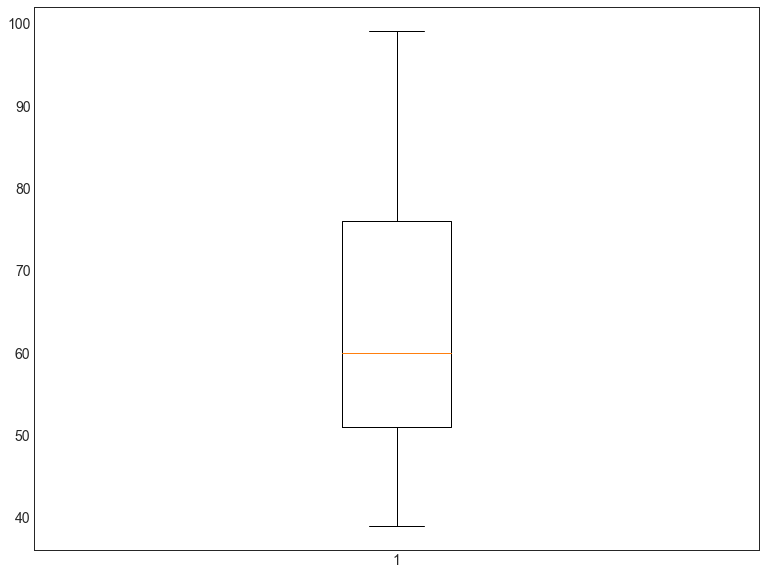

In [17]:
plt.boxplot(x = train.avg_training_score)
plt.show()

In [18]:
train.avg_training_score.min()
print(' Max:', train.avg_training_score.max(),'\n','Min:', train.avg_training_score.min())

 Max: 99 
 Min: 39


### Conclusion
Hopefully we don't have outliers in our data, so we can continue cleaning our data and prepare it to the model building.

## Remove extra features
Here we will remove features, which we won't use in our model building.

In [19]:
employee_id = train.employee_id
train = train.drop(columns= ['employee_id'])
train = train.rename(columns = {'awards_won?':'awards_won'})
#we are dropping employee id, because it's not important feature, also 

In [20]:
train.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won', 'avg_training_score', 'is_promoted'],
      dtype='object')

## Creating new features
Here we will create new features like age, when employee start his career.

In [21]:
train['career_start_age'] = train.age - train.length_of_service
#firstly we need to create feature, which describe age, when employee started his career at company
#let's look how it's connected with promotion

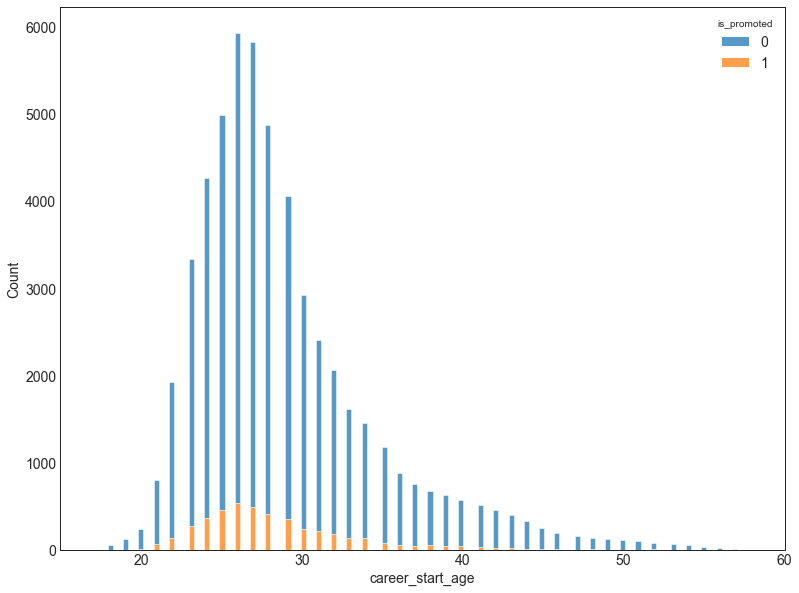

In [22]:
sns.histplot(x = 'career_start_age', hue = 'is_promoted', data = train, multiple= 'stack')
plt.show()
#it's a strong correlation between promotion and career start age feature, in my opinion it would help us to built good model

## Feature scaling
Here we will scale our numeric features for better work of our model. As we can see most of our features is categorical. Age and start age career included. Only feature, which we will scale is avg_training_score.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train['avg_training_score'] = scaler.fit_transform(train['avg_training_score'].to_frame())

#we scaled by min-max, because it's optimal in our situation

In [24]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted,career_start_age
0,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,0.166667,0,27
1,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,0.350000,0,26
2,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,0.183333,0,27
3,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,0.183333,0,29
4,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,0.566667,0,43


## Transforming categorical variable to quantitative 
Here we will transform our categorical variables to quantitative. 

In [25]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
x = train
enc = OrdinalEncoder()

In [26]:
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)
    
#this class i've got from stackoverflow, thanks to this user https://stackoverflow.com/users/1610342/pricehardman  

In [27]:
train = MultiColumnLabelEncoder(columns = [
    'department', 
    'region', 
    'education', 
    'gender', 
    'recruitment_channel'
]).fit_transform(x)

In [28]:
train.head()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won,avg_training_score,is_promoted,career_start_age
0,7,31,2,0,2,1,35,5.0,8,1,0,0.166667,0,27
1,4,14,0,1,0,1,30,5.0,4,0,0,0.350000,0,26
2,7,10,0,1,2,1,34,3.0,7,0,0,0.183333,0,27
3,7,15,0,1,0,2,39,1.0,10,0,0,0.183333,0,29
4,8,18,0,1,0,1,45,3.0,2,0,0,0.566667,0,43


## Exporting our dataset
Here we will export our dataset to csv file, what we will use in next stage: model building.

In [29]:
train.to_csv('prepared_train', index= False)

## Afterword
We transformed our data, we scaled, filled na, convert features, created new. But we did it only on our train dataset. In other .py file we will write  classes, functions, which we will use to transform, without so much code and explaining. 